# HW3: Solving the Brusselator Model and Reaction-Diffusion Systems in the Persuit of Turing Patterns 

## Introduction - Learning Objectives   

The objective of this assignment is to guide the student in solving reaction-diffusion systems. The Brusselator model will be used as example.  

### Reaction-Diffusion Systems - Brusselator Model 
Reaction-Diffusion: Describe reaction-diffusion systems in general terms, oscillating chremical reactions and the occurence of Turing patterns, the mathematical formulation of these models and the numerical solution of these models by citing literature (insert book used by Vivi here). A demo of a oscillating chemical reaction is given here [An Oscalliation Chemical Reaction by the Royal Chemistry Society](https://www.youtube.com/watch?v=9TzYmmfcDW4). A demo describing the occurance of Turing patterns is given here [Belousov-Zhabotinsky reaction](https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/13%3A_Continuous_Field_Models_I__Modeling/13.06%3A_Reaction-Diffusion_Systems). Describe the Brusselator model as mathematical model for chemical oscillators. 

Brusselator model: The Brusselator model is a model for two chemical species.  

This assignment: We intend to go through the following three steps: solve as ODE  model, solve a one-dimensional ODE model and solve as two-dimensional PDE model. These steps are described in more details in what follows.

### Two-Species Initial Value for ODE Model 
Describe model a system of two coupled ordinary differential equations in time (t) plus initial conditions. 
Here we assume homogeneuos or well stirred reactors. The dependent variables have thus no spatial dependency. Two parameters in the model. Shown on the [wiki page](https://en.wikipedia.org/wiki/Brusselator) (reproduced below) and [bio-physics wiki](http://www.bio-physics.at/wiki/index.php?title=Brusselator) (derivation of the model, spectral analysis, reference solutions). 

Physical questions: oscillating vs. steady state solution depending on the two parameters in the ODE. Spectral analysis (analysis of eigenvalues and eigenvectors) of the Jacobian as explained in e.g. [document by Michael Giver](http://216.92.172.113/BZbootcamp/files/matlab/Giver.pdf). Ask students to repeat the analysis using e.g. sympy. Give physical interpretation to parameter-value dependence. Verify analysis by solving ODE system for various parameter values. Plot solutions vs. time and in phase diagram. 

Numerical analysis questions:
1. explicit time integration: document number of function evaluations and time step evolution for various values of atol and rtol; 
2. implicit time integration without explicit Jacobian: document number of function and Jacobian evaluations for various values of atol and rtol;
3. implicit time integration with explicit Jacobian: document number of function and Jacobian evaluations for various values of atol and rtol;
4. investigate variants of time-integration methods that Python provides; 
5. hand-code the time integration; 

### Two-Species Boundary Value for ODE Model 
Describe model a system of two coupled ordinary differential equations in space (x) plus boundary conditions. This model acts as a steady variant for future models. 

### Two-Species One-Dimensional Transient PDE Model
Describe model a system of two coupled partial differential equations in space (x) and time (t) plus boundary conditions plus boundary conditions. Observe unequal diffusion constants for u and v. 
 
Physical questions: how does solution change with diffusion parameter for u and v, reaction term and initial condition? Spectral analysis of the Jacobian of the reaction-diffusion system as shown in maini-woolley-2019.pdf   

Mathematical question: how is accuracy affected by discrertization in space and time? How to treat the stiffness in the time-integration? Can steady-state solution be recovered using a shooting method?

Reference solutions in the paper by Lust, in [Julia using BifurcationKit.jl](https://rveltz.github.io/BifurcationKit.jl/dev/tutorials/tutorials3/#d-Brusselator-(automatic)) and [by Lucas Wittmann](https://www.lukaswittmann.com/brusselator.html) (what is influence of amplitude in the perturbations of the initial conditions? to what extend are solutions grid independent?)

#### To do 
1. solve using py-pde by adapting model given in [in Python using py-pde](https://py-pde.readthedocs.io/en/latest/examples_gallery/pde_brusselator_expression.html) or the code given on [Python Implementation of the FitzHugh–Nagumo Model](https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/) using the values for the Brusselator model as documented on the wikipedia page for the Brusselator model; 
2. solve the steady-state model using the solve_bvp() function with parameter value; 
3. solve using home-brewed code using second order finite differences on uniform mesh. Spatial discretization of the linear diffusion term using central finite difference method on a uniform mesh. Spatial discretization of the non-linear reaction terms using collocation.
4. can we split the right-hand side of the ODE in a stiff and non-stiff part and treat both ternms on an unequal setting?

### Two-Species Two-Dimensional Transient PDE Model
Describe model a system of two coupled partial differential equations in space (x) and time (t) plus boundary conditions plus boundary conditions.

Discussion on the physics and numerics as before.  

Reference solutions [in Python using py-pde](https://py-pde.readthedocs.io/en/latest/examples_gallery/pde_brusselator_expression.html) or  [in Julia using DifferentialEquations.jl](https://diffeq.sciml.ai/stable/tutorials/advanced_ode_example/); (test case from Hairer and Wanner, Part II or test cases from maini-woolley-2019.pdf) or [in Julia using  MethodOfLines.jl](https://github.com/SciML/MethodOfLines.jl/blob/master/test/pde_systems/brusselator_eq.jl). 

### Concluding remarks
Extension to Fisher equation, Kolmogorov-Petrovsky-Piskunov equation, Oregonator model, Schnakenberg model, Gray-Scott model and FitzHugh–Nagumo model;

## Import Libraries

In [5]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported sympy -- Version: 1.8
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


## Section 1/: Introduction and Model Description

Extend version of introduction given above.   

## Section 2/: Brusselator model as ODE 

### Section 1.2/: Stability Analysis of the Brusselator model as ODE 

Analysis of eigenvalues and eigenvectors of the Jacobian as explained in e.g. [document by Michael Giver](http://216.92.172.113/BZbootcamp/files/matlab/Giver.pdf). Ask students to compute the Jacobian and to compute its eigenvectors and eigenvalues.

Make sure students understand the Jacobian, its eigenvalues and the stability analysis.  

### Section 2.2/: Brusselator model as ODE solved using the scipy.integrate.odeint() function 

The example that follows employs [scipy.integrate.odeint()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html). Repeat to confirm theoretical analysis in previous section.

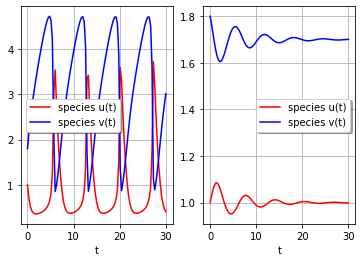

In [6]:
#..set rhs-function of ODE system 
def righthandside_dt(u, t, alpha, beta):
    X, Y = u
    du1 = alpha + X*X*Y - beta*X - X 
    du2 = beta*X - X*X*Y 
    return [du1, du2]

#..set parameter values 
alpha1=1; beta1=3;
alpha2=1; beta2=1.7;

#..set initial conditions 
#u0 = [1.0, 1.0];
u0 = [alpha2,beta2/alpha2+0.1]; 

#..set time interval 
t = np.linspace(0, 30, 101);

#..solve ODE system for two sets of parameter values 
computed1 = odeint(righthandside_dt, u0, t, args=(alpha1, beta1), full_output=1, printmessg=0);
computed2 = odeint(righthandside_dt, u0, t, args=(alpha2, beta2), full_output=1, printmessg=0);

#..plot solution obtained 
fig, axs = plt.subplots(1, 2) 
axs[0].plot(t, computed1[0][:, 0], 'r', label='species u(t)')
axs[0].plot(t, computed1[0][:, 1], 'b', label='species v(t)')
axs[0].set_xlabel('t')
axs[0].legend(['species u(t)', 'species v(t)'], shadow=True, loc='best')
axs[0].grid()
axs[1].plot(t, computed2[0][:, 0], 'r', label='species u(t)')
axs[1].plot(t, computed2[0][:, 1], 'b', label='species v(t)')
axs[1].set_xlabel('t')
axs[1].legend(['species u(t)', 'species v(t)'], shadow=True, loc='best')
axs[1].grid()
plt.show()

### Section 3.2/: Brusselator again using now the scipy.integrate.solve_ivp() function 

The example that follows way modeled after [the scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). Observe: 
* different order of input arguments;
* different plotting functionality; what does dense_output = True do? 
* plotting can be further elaborated; 

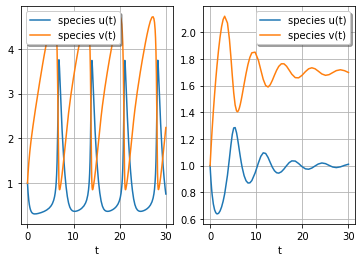

643
22
165
3


In [7]:
#..set rhs-function of ODE system 
def righthandside_dt(t, u, alpha, beta):
    X, Y = u
    du1 = alpha + X*X*Y - beta*X - X 
    du2 = beta*X - X*X*Y 
    return [du1, du2]

#..set parameter values 
alpha1=1; beta1=3;
alpha2=1; beta2=1.7;

#..set initial conditions 
u0 = [1.0, 1.0];

#..solve ODE system
computed1 = scipy.integrate.solve_ivp(righthandside_dt, t_span=[0,30], y0=u0, args=(alpha1, beta1), 
                                      method = 'BDF', dense_output=True);
computed2 = scipy.integrate.solve_ivp(righthandside_dt, t_span=[0,30], y0=u0, args=(alpha2, beta2), 
                                      method = 'BDF', dense_output=True);

#..plot the computed solutions 
fig, axs = plt.subplots(1, 2) 
z1 = computed1.y
z2 = computed2.y
axs[0].plot(computed1.t, z1.T)
axs[0].set_xlabel('t')
axs[0].legend(['species u(t)', 'species v(t)'], shadow=True, loc='best')
axs[0].grid()
axs[1].plot(computed2.t, z2.T)
axs[1].set_xlabel('t')
axs[1].legend(['species u(t)', 'species v(t)'], shadow=True, loc='best')
axs[1].grid()
plt.show()

print(computed1.nfev) 
print(computed1.njev) 
print(computed2.nfev)
print(computed2.njev)

### Section 4.2:/ Brusselator again using now the scipy.integrate.solve_ivp() function with Jacobian explicitly provided 

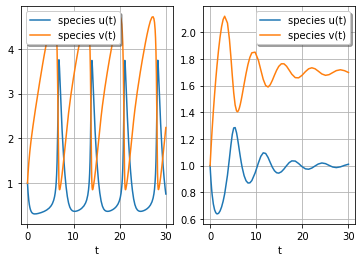

643
22
165
3
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 165
     njev: 3
      nlu: 18
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fba5b2b5710>
   status: 0
  success: True
        t: array([0.00000000e+00, 3.32833662e-03, 6.65667324e-03, 3.99400395e-02,
       7.32234057e-02, 1.93806646e-01, 3.14389886e-01, 4.34973126e-01,
       7.00444693e-01, 9.65916260e-01, 1.23138783e+00, 1.49685939e+00,
       1.82810360e+00, 2.15934780e+00, 2.49059201e+00, 2.82183621e+00,
       3.15308042e+00, 3.76193192e+00, 4.19168499e+00, 4.49992808e+00,
       4.80817117e+00, 5.11641427e+00, 5.42465736e+00, 5.73290046e+00,
       5.93702557e+00, 6.14115068e+00, 6.34527579e+00, 6.54940090e+00,
       6.75352601e+00, 6.95765112e+00, 7.37453150e+00, 7.79141188e+00,
       8.20829226e+00, 8.62517264e+00, 9.04205302e+00, 9.75724032e+00,
       1.04724276e+01, 1.09965065e+01, 1.15205853e+01, 1.20446642e+01,
       1.25687431e+01, 1.30320894e+

In [8]:
#..set rhs-function of ODE system 
def righthandside_dt(t, u, alpha, beta):
    X, Y = u
    du1 = alpha + X*X*Y - beta*X - X 
    du2 = beta*X - X*X*Y 
    return [du1, du2]

def jacfunc(t, u, alpha, beta):
    X, Y = u
    du1dX = 2*X*Y - beta - 1 
    du2dX = beta - 2*X*Y 
    du1dY = X*X 
    du2dY = - X*X     
    # return np.array([[du1dX, du1dY], [du2dX, du2dY]])
    return np.array([[du1dX, du1dY], [du2dX, du2dY]])

#..set parameter values 
alpha1=1; beta1=3;
alpha2=1; beta2=1.7;

#..set initial conditions 
u0 = [1.0, 1.0];

#..solve ODE system
computed1 = scipy.integrate.solve_ivp(righthandside_dt, t_span=[0,30], y0=u0, args=(alpha1, beta1), 
                                      dense_output=True, method = 'BDF', jac=jacfunc);
computed2 = scipy.integrate.solve_ivp(righthandside_dt, t_span=[0,30], y0=u0, args=(alpha2, beta2), 
                                      dense_output=True, method = 'BDF', jac=jacfunc);

#..plot solution obtained 
#..plot the computed solutions 
fig, axs = plt.subplots(1, 2) 
z1 = computed1.y
z2 = computed2.y
axs[0].plot(computed1.t, z1.T)
axs[0].set_xlabel('t')
axs[0].legend(['species u(t)', 'species v(t)'], shadow=True, loc='best')
axs[0].grid()
axs[1].plot(computed2.t, z2.T)
axs[1].set_xlabel('t')
axs[1].legend(['species u(t)', 'species v(t)'], shadow=True, loc='best')
axs[1].grid()
plt.show()

print(computed1.nfev) 
print(computed1.njev) 
print(computed2.nfev)
print(computed2.njev)

print(computed2)

## Section 3/: Steady State Brusselator model as ODE in 1D Space (only for steady state solution, in case it exists, how does steady state change in the presence of diffusion)
In case that steady state solution does exist (no oscillations), then steady state can be computed using a shooting method. We wish to examine the effect of the diffusion.

Need to extend code to make fun and bc depend on parameters p. See [example](https://gist.github.com/nmayorov/f8af5ca956c6a7f75ecdb578a2655894).

### Using the solve_bvp() function to solve the steady state model 

In [54]:
alpha1=1; beta1=3;
p = [alpha1, beta1]
aa, bb = p 
print(aa)
print(bb)

1
3


   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          7.19e-01       0.00e+00          10             18       
       2          2.35e-08       0.00e+00          28              0       
Solved in 2 iterations, number of nodes 28. 
Maximum relative residual: 2.35e-08 
Maximum boundary residual: 0.00e+00


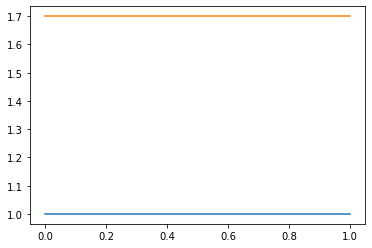

In [63]:
A = 1
B = 1.7
Dx = 0.0016
Dy = 0.008
L = 0.5

#..set parameter values 
alpha1=1; beta1=3;
alpha2=1; beta2=1.7;

def fun(x, u):
    f = A + u[0]**2 * u[2] - (B + 1) * u[0]
    g = B * u[0] - u[0]**2 * u[2]
    return np.vstack((
        u[1],
        -f * L**2 / Dx,
        u[3],
        -g * L**2 / Dy
    ))

def bc(ua, ub):
    return np.array((ua[0] - A, ub[0] - A, ua[2] - B/A, ub[2] - B/A)) 

x = np.linspace(0, 1, 10)
u = np.zeros((4, x.size))

TOL=1e-6
res = scipy.integrate.solve_bvp(fun, bc, x, u, tol=TOL, verbose=2)

plt.plot(res.x, res.y[0])
plt.plot(res.x, res.y[2])

## Section 4/: Brusselator model as PDE in 1D ((1/2) recover steady in case it exists and recover same solutions as before, (2/2) find also oscillatory solutions)

A model formulation is given in [Section 4.1 of Lust-1997](https://epubs.siam.org/doi/epdf/10.1137/S1064827594277673). Values of $L$ are given in Figure 4.1 of the same reference. Initial values (steady state branch?) for $X$ and $Y$ are left unspecified. Should we use $X(x,0) = A$ and $Y(x,0) = B/A$?. 

Model is various intermediate steps. 

### Section 1.4/: Diffusion Matrix as a Script  

In [6]:
N = 4; h=1/N; h2=h*h; xvec = np.linspace(0,1,N+1);
e = np.ones(N+1); 
A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
A = (1/h2)*A; 
A[0][0]=1; A[0][1]=0;     # handling left-most boundary condition 
A[-1][-1]=2/h2; A[-1][-2]=-2/h2; # handling right-most Neumann boundary condition 
#A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirichlet boundary condition
print(A); #print(xvec)

[[  1.   0.   0.   0.   0.]
 [-16.  32. -16.   0.   0.]
 [  0. -16.  32. -16.   0.]
 [  0.   0. -16.  32. -16.]
 [  0.   0.   0. -32.  32.]]


### Section 2.4/: Diffusion matrix as a Function (needs more work on boundary conditions and making sparse) 

Seperate cell to test the construction of 1D diffusion matrix. Will be absorbed in a seperate notebook later.

In [7]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

N = 5 

A = poisson_1d(N)
print(A)

[[  1.   0.   0.   0.   0.   0.]
 [-25.  50. -25.   0.   0.   0.]
 [  0. -25.  50. -25.   0.   0.]
 [  0.   0. -25.  50. -25.   0.]
 [  0.   0.   0. -25.  50. -25.]
 [  0.   0.   0.   0.   0.   1.]]


### Section 3.4/: Right-Hand Function for ODE

Seperate cell to test the application of the right-hand side function. 

In [8]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    dudt = 0.1*np.dot(A,u)  + u**2
    return dudt

N = 4

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1)
k = 3 
u0 = np.sin(k*np.pi*x)

computed = righthandside_dt(t,u0,A)

display(computed)

array([ 0.0000000e+00,  4.3627417e+00, -4.4627417e+00,  4.3627417e+00,
        3.6739404e-17])

### Section 4.4/: Perform Time Integration without Post-Processing 

In [11]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    dudt = 0.1*np.dot(A,u)  # + 1*u**2
    return dudt

N = 40

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1)
k=3; u0 = np.sin(k*np.pi*x)

computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,),t_span=[0,0.1],y0=u0, dense_output=True)

print(np.shape(computed.y[:,5:]))
print(computed)
print(computed.y)

(41, 0)
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 14
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7ff3c855d550>
   status: 0
  success: True
        t: array([0.        , 0.04205079, 0.1       ])
 t_events: None
        y: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.33445364e-01,  3.38575051e-01,  5.65217853e-01],
       [ 4.53990500e-01,  6.58440391e-01,  1.09899665e+00],
       [ 6.49448048e-01,  9.41920209e-01,  1.57240249e+00],
       [ 8.09016994e-01,  1.17334937e+00,  1.95849323e+00],
       [ 9.23879533e-01,  1.33993905e+00,  2.23675926e+00],
       [ 9.87688341e-01,  1.43248349e+00,  2.39109298e+00],
       [ 9.96917334e-01,  1.44586867e+00,  2.41356307e+00],
       [ 9.51056516e-01,  1.37935491e+00,  2.30236827e+00],
       [ 8.52640164e-01,  1.23661778e+00,  2.06438874e+00],
       [ 7.07106781e-01,  1.02554495e+00,  1.71159371e+00],
       [ 5.22498565e-

### Section 4.4/: Perform Time Integration and Post-Processing

(41, 921)


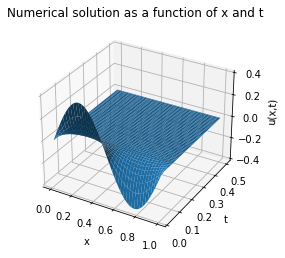

In [10]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    dudt = -np.dot(A,u)  # + u**2
    return dudt

N = 40

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1)
k = 2
u0 = np.sin(k*np.pi*x)

#..perform time integration  
computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,),t_span=[0,0.5],y0=u0)

#..prepare variables for plotting 
t = computed.t
XX, TT = np.meshgrid(x,t[1:])

#..post-processing 
fig = plt.figure()
axes = fig.gca(projection='3d')
z = computed.y[:,1:]
print(np.shape(z))
axes.plot_surface(XX,TT,z.T)
axes.set_xlabel('x')
axes.set_ylabel('t')
axes.set_zlabel('u(x,t)')
axes.set_title('Numerical solution as a function of x and t')
plt.show()

### Section 4.4/: Perform Time Integration and Post-Processing on block form as initial guess (first attempt to work with Fisher equation)

(41, 26)


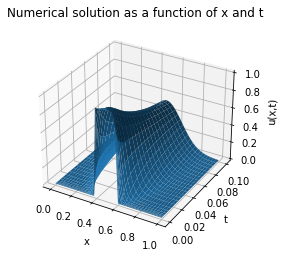

In [18]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    dudt = -0.1*np.dot(A,u)+u*(u-.4)
    return dudt

N = 40

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1)
k = 2
u0 = (x>=0.4)*(x<=0.6)

#..perform time integration  
computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,),t_span=[0,0.1],y0=u0)

#..prepare variables for plotting 
t = computed.t
XX, TT = np.meshgrid(x,t[1:])

#..post-processing 
fig = plt.figure()
axes = fig.gca(projection='3d')
z = computed.y[:,1:]
print(np.shape(z))
axes.plot_surface(XX,TT,z.T)
axes.set_xlabel('x')
axes.set_ylabel('t')
axes.set_zlabel('u(x,t)')
axes.set_title('Numerical solution as a function of x and t')
plt.show()

### Section 5.4/: Seperate Test on Vector Concatenation and Slicing

In [13]:
#..put two vectors together 
uu0 = np.array([1., 2.])
vv0 = np.array([3., 4.])
u0 = np.concatenate([uu0,vv0]) 
print(u0)

#..take vectors apart gain 
n = np.size(u0)
print(n//2)
uuu0 = u0[:n//2]; vvv0 = u0[n//2:]
print(uuu0)
print(vvv0)

[1. 2. 3. 4.]
2
[1. 2.]
[3. 4.]


### Section 6.4/: Seperate Test on Matrix Slicing

In [14]:
A = np.array([[1., 2., 3., 4.],[10., 20., 30., 40.]])
print(A[:,2:])

[[ 3.  4.]
 [30. 40.]]


### Section 7.4/: Right-Hand Function for ODE for Two Species 

In [15]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    n = np.size(u)
    uu = u[:n//2]; vv = u[n//2:]
    duudt = - 0.1*np.dot(A,uu)  + uu**2
    dvvdt = - 0.1*np.dot(A,vv)  + vv**2
    dudt = np.concatenate([uu,vv])
    return dudt

N = 4

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1)
k = 3; uu0 = np.sin(k*np.pi*x)
k = 5; vv0 = np.sin(k*np.pi*x)
u0 = np.concatenate([uu0,vv0])

computed = righthandside_dt(t,u0,A)

display(computed)

array([ 0.00000000e+00,  7.07106781e-01, -1.00000000e+00,  7.07106781e-01,
        3.67394040e-16,  0.00000000e+00, -7.07106781e-01,  1.00000000e+00,
       -7.07106781e-01,  6.12323400e-16])

### Section 8.4/: Perform Time Integration without Post-Processing for ODE for Two Species 

In [16]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    n = np.size(u)
    uu = u[:n//2]; vv = u[n//2:]
    duudt = 0.1*np.dot(A,uu)  + uu**2
    dvvdt = 0.1*np.dot(A,vv)  + vv**2
    dudt = np.concatenate([uu,vv])
    return dudt

N = 4

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1)
k = 3; uu0 = np.sin(k*np.pi*x)
k = 5; vv0 = np.sin(k*np.pi*x)
u0 = np.concatenate([uu0,vv0])

computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,),t_span=[0,0.5],y0=u0, dense_output=True)

print(computed)
print(computed.sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 14
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fa3b8acf3d0>
   status: 0
  success: True
        t: array([0.        , 0.10526782, 0.5       ])
 t_events: None
        y: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.07106781e-01,  7.85601379e-01,  1.16582257e+00],
       [-1.00000000e+00, -1.11100812e+00, -1.64872209e+00],
       [ 7.07106781e-01,  7.85601379e-01,  1.16582257e+00],
       [ 3.67394040e-16,  4.08177763e-16,  6.05730670e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.07106781e-01, -7.85601379e-01, -1.16582257e+00],
       [ 1.00000000e+00,  1.11100812e+00,  1.64872209e+00],
       [-7.07106781e-01, -7.85601379e-01, -1.16582257e+00],
       [ 6.12323400e-16,  6.80296272e-16,  1.00955112e-15]])
 y_events: None


### Section 7.4/: Perform Time Integration with Post-Processing for ODE for Two Species 

(42, 1000)


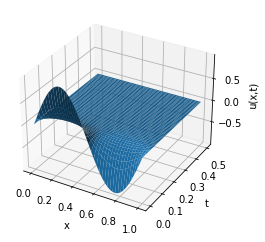

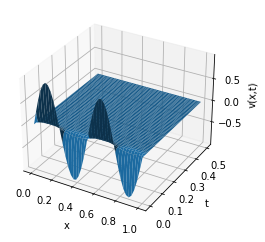

In [17]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A):
    n = np.size(u)
    uu = u[:n//2]; vv = u[n//2:];     
    duudt = -np.dot(A,uu)  # + u**2
    dvvdt = -np.dot(A,vv)  # + u**2
    dudt = np.concatenate([duudt,dvvdt])
    return dudt

N = 41; Np1 = N+1 

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1)
k = 2; uu0 = np.sin(k*np.pi*x)
k = 4; vv0 = np.sin(k*np.pi*x)
u0 = np.concatenate([uu0,vv0])

#..perform time integration  
computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,),t_span=[0,0.5],y0=u0)

#..prepare variables for plotting 
t = computed.t
XX, TT = np.meshgrid(x,t)
zu = computed.y[:Np1,:]
zv = computed.y[Np1:,:]
print(np.shape(zu))

#..post-processing 
fig = plt.figure()
ax1 = fig.gca(projection='3d')
ax1.plot_surface(XX,TT,zu.T)
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
plt.show() 
fig = plt.figure()
ax2 = fig.gca(projection='3d')
ax2.plot_surface(XX,TT,zv.T)
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('v(x,t)')
plt.show()

### Section 8.4/: Perform Time Integration with Post-Processing for ODE for Two Species 

(42, 5377)


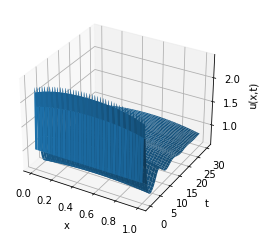

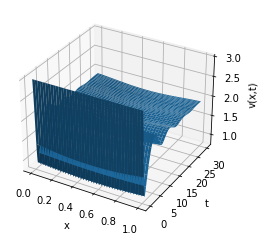

In [18]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def ode_dt(u, t, alpha, beta):
    X, Y = u
    du1 = alpha + X*X*Y - beta*X - X 
    du2 = beta*X - X*X*Y 
    return [du1, du2]


def righthandside_dt(t,u,A):
    alpha = 1; beta = 3; beta = 1.7; 
    D1 = 0.008; D2 = 0.004; l = 0.3; 
    n = np.size(u)
    uu = u[:n//2]; vv = u[n//2:];     
    duudt = -(D1/l**2)*np.dot(A,uu) + alpha + uu**2*vv - beta*uu - uu 
    dvvdt = -(D2/l**2)*np.dot(A,vv) + beta*uu - uu**2*vv 
    dudt = np.concatenate([duudt,dvvdt])
    return dudt

N = 41; Np1 = N+1 

A = poisson_1d(N)

# define right-hand side vector 
x = np.linspace(0,1,N+1)
alpha = 1; beta = 3
k = 2; uu0 = alpha*np.ones(np.size(x)); # np.sin(k*np.pi*x)
k = 4; vv0 = (beta/alpha)*np.ones(np.size(x)); # np.sin(k*np.pi*x)
u0 = np.concatenate([uu0,vv0])

#..perform time integration  
computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,),t_span=[0,30],y0=u0)

#..prepare variables for plotting 
t = computed.t
XX, TT = np.meshgrid(x,t)
zu = computed.y[:Np1,:]
zv = computed.y[Np1:,:]
print(np.shape(zu))

#..post-processing 
fig = plt.figure()
ax1 = fig.gca(projection='3d')
ax1.plot_surface(XX,TT,zu.T)
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
plt.show() 
fig = plt.figure()
ax2 = fig.gca(projection='3d')
ax2.plot_surface(XX,TT,zv.T)
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('v(x,t)')
plt.show()

## Section 5/: Brusselator model as PDE in 2D 

Add non-linear terms to two copies of the Poisson-2D matrix (see ANM-2021 Python introduction), perform implicit time integration. 

### Section 1.5/: Create 2D Poisson matrix as Function 

In [22]:
# need to identify boundary nodes 
# need to set submatrix of A equal to the identity matrix 
def poisson_2d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A1 = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A1 = (1/h2)*A1; 
    A1[0][0]=1; A1[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A1[-1][-1]=1; A1[-1][-2]=0; # handling right-most Dirchlet boundary condition
    B1 = np.identity(N+1);
    A = np.kron(A1,B1) + np.kron(B1,A1)
    return A

N = 2

A = poisson_2d(N)
print(A)

[[ 2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-4.  9. -4.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [-4.  0.  0.  9.  0.  0. -4.  0.  0.]
 [-0. -4. -0. -4. 16. -4. -0. -4. -0.]
 [ 0.  0. -4.  0.  0.  9.  0.  0. -4.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -4.  9. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2.]]


### Using py-pde 

In [3]:
from pde import CartesianGrid, PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

In [4]:
from pde import CartesianGrid, PDE, FieldCollection, PlotTracker, ScalarField, UnitGrid

# define the PDE
a, b = 1, 3
d0, d1 = 1, 0.1
d0, d1 = 1, 1
eq = PDE(
    {
        "u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
        "v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
    }
)

# initialize state
# grid = UnitGrid([64, 64])
grid = CartesianGrid([[0, 1]], 32, periodic=False)
u = ScalarField(grid, a, label="Field $u$")
v = b / a + 0.1 * ScalarField.random_normal(grid, label="Field $v$")
state = FieldCollection([u, v])

# simulate the pde
# tracker = PlotTracker(interval=1, plot_args={"vmin": 0, "vmax": 5})
# sol = eq.solve(state, t_range=20, dt=1e-3, tracker=tracker)
sol = eq.solve(state, t_range=20, dt=1e-3)

  0%|          | 0/20.0 [00:00<?, ?it/s]

Simulation aborted at t=0.017 (Field was not finite)


## Section 6/: Other Models 

Repeat above for Fisher equation, Kolmogorov-Petrovsky-Piskunov equation, Oregonator model, Schnakenberg model, Gray-Scott model and FitzHugh–Nagumo model; 

## Section 7/: Reference Models in Not Python 
see [notebook](not-python-HW2-pde-reaction-diffusion.ipynb)

## References 

To be extended. 

1. [wiki on Reaction-Diffusion Systems and Gray-Scott Model](https://en.wikipedia.org/wiki/Reaction–diffusion_system)

2. [wiki Fisher and KPP Equation](https://en.wikipedia.org/wiki/Fisher%27s_equation). Document analytical solutions for the Fisher equation. Source term $F(u) = u(1-u)$. Very similar to growth model in ANM-2021. Explain solutions. Solve Fisher equation using finite differences in space and implicit time-stepping with variable time step;

3. [wiki on Brusselator Model](https://en.wikipedia.org/wiki/Brusselator)

4. [wiki on Oregonator Model](https://en.wikipedia.org/wiki/Oregonator): model for auto-catalysis, and thus interesting to explore; 

5. [Non-Python Implementation of the Brusselator Model](https://diffeq.sciml.ai/stable/tutorials/advanced_ode_example/) See Hairer-2 for the definition of the test case;
 
6. [Python Implementation of the FitzHugh–Nagumo Model](https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/)

7. [Book by Grindrod](http://www.grindrodbook.com/)

8. Guiu-Souto, Jacobo, et al. "Manipulation of diffusion coefficients via periodic vertical forcing controls the mechanism of Turing pattern formation." Physical Review E 82.6 (2010): 066209 [https://journals.aps.org/pre/pdf/10.1103/PhysRevE.82.066209?casa_token=StWd8LAlg18AAAAA%3AVcXU45U2oSxFH8C4juSzSK2PsMNAEcZ3BvqrpdqF9NUXjJPL5H5NuTTGZ0MZsZrsAoxIAu21NjX0]

9. Guiu-Souto, Jacobo, Jorge Carballido-Landeira, and Alberto P. Munuzuri. "Characterizing topological transitions in a Turing-pattern-forming reaction-diffusion system." Physical Review E 85.5 (2012): 056205. [https://journals.aps.org/pre/abstract/10.1103/PhysRevE.85.056205]